# Treinamento de um modelo de Regressão Linear utilizando a Equação Normal
<h3>Gerando matriz X com dados de treino</h3>

In [161]:
import numpy as np
import numpy.random as rnd

X_original = 10 * rnd.rand(100, 1)

In [162]:
X_original

array([[7.62332775],
       [4.23916769],
       [1.50746042],
       [0.86941319],
       [4.65184741],
       [5.26215603],
       [2.63001021],
       [8.57215804],
       [8.88225288],
       [7.82909615],
       [8.3535605 ],
       [4.72108042],
       [3.18009528],
       [7.00288347],
       [4.14744404],
       [6.92697131],
       [1.88590372],
       [1.59582926],
       [3.40353147],
       [2.98053422],
       [3.27355029],
       [3.18259102],
       [2.00227985],
       [4.59299191],
       [3.30964996],
       [7.8410419 ],
       [3.06464677],
       [0.29647589],
       [6.0630107 ],
       [0.10354634],
       [9.73806224],
       [3.7797378 ],
       [2.18489517],
       [9.75913398],
       [0.30738128],
       [4.54115543],
       [0.28234907],
       [8.57472212],
       [2.25202415],
       [7.21660323],
       [1.8948252 ],
       [8.40601239],
       [4.96133646],
       [6.22695709],
       [3.85210296],
       [3.3471037 ],
       [3.65176961],
       [2.353

<h2>Função <i>f</i>(<b>x</b>):</h2>
<p>A função <i>f</i>(<b>x</b>) tem o seguinte formato geral:</p>
<p><i>f</i>(<b>x</b>) = mx + b, ou seja:</p>
<p>y = mx + b</p>
<p>Esta função geralmente é desconhecida. Porém, para fins didáticos, neste exemplo nós conhecemos a função e iremos gerar dados com ela. Utilizaremos os seguintes coeficientes:</p>
<p>x = 0,8</p>
<p>b = 4,0</p>
<p>De forma que no nosso exemplo a função <i>f</i>(<b>x</b>) é a seguinte:</p>
<p><i>f</i>(<b>x</b>) = 0,8x + 4 + erro, ou seja:</p>
<p>y = 0,8x + 4 + erro</p>
<p>Por enquanto, vamos gerar nosso dataset de exemplo com estes coeficientes e visualizá-lo. Depois, sem utilizar os coeficientes originais, os quais conhecemos, utilizaremos regressão linear para tentar descobrir estes coeficientes.</p>
<h2>Utilizando a Função <i>f</i>(<b>x</b>) para gerar um dataset:</h2>

In [163]:
y = 0.8 * X_original + 4 + rnd.randn(100, 1)
y

array([[10.85240127],
       [ 6.64150116],
       [ 7.69088578],
       [ 5.97942144],
       [ 7.71807866],
       [ 8.36223617],
       [ 6.46565939],
       [10.87891285],
       [10.81249817],
       [10.75078254],
       [12.20901348],
       [ 9.13442513],
       [ 6.80120135],
       [12.1688753 ],
       [ 5.80159411],
       [ 8.65953751],
       [ 6.23984868],
       [ 4.78610226],
       [ 6.549824  ],
       [ 6.56897463],
       [ 6.78295308],
       [ 6.46740833],
       [ 6.05515001],
       [ 9.18295051],
       [ 5.2673982 ],
       [12.16455691],
       [ 6.72134932],
       [ 3.71081084],
       [ 9.27903228],
       [ 3.69054824],
       [11.65432012],
       [ 7.30454762],
       [ 4.92226208],
       [11.9105971 ],
       [ 3.47208658],
       [ 7.0444041 ],
       [ 3.36892538],
       [10.10067352],
       [ 6.41407585],
       [ 9.71304712],
       [ 6.29866967],
       [ 9.27137226],
       [ 9.16754463],
       [ 8.63305151],
       [ 5.88150704],
       [ 5

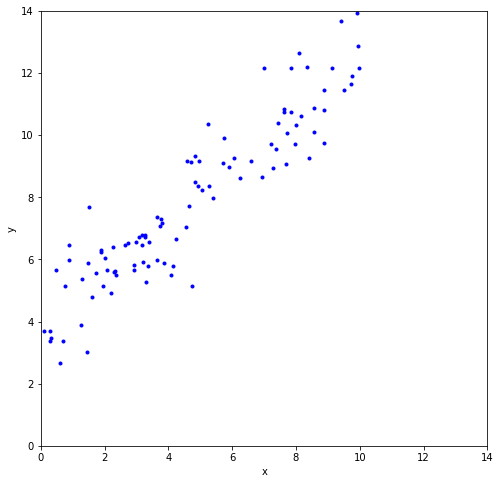

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(X_original, y, "b.")
plt.axis([0, 14, 0, 14])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<h3>Acrescentando a coluna 0 em X</h3>

In [165]:
X_original

array([[7.62332775],
       [4.23916769],
       [1.50746042],
       [0.86941319],
       [4.65184741],
       [5.26215603],
       [2.63001021],
       [8.57215804],
       [8.88225288],
       [7.82909615],
       [8.3535605 ],
       [4.72108042],
       [3.18009528],
       [7.00288347],
       [4.14744404],
       [6.92697131],
       [1.88590372],
       [1.59582926],
       [3.40353147],
       [2.98053422],
       [3.27355029],
       [3.18259102],
       [2.00227985],
       [4.59299191],
       [3.30964996],
       [7.8410419 ],
       [3.06464677],
       [0.29647589],
       [6.0630107 ],
       [0.10354634],
       [9.73806224],
       [3.7797378 ],
       [2.18489517],
       [9.75913398],
       [0.30738128],
       [4.54115543],
       [0.28234907],
       [8.57472212],
       [2.25202415],
       [7.21660323],
       [1.8948252 ],
       [8.40601239],
       [4.96133646],
       [6.22695709],
       [3.85210296],
       [3.3471037 ],
       [3.65176961],
       [2.353

In [166]:
X = np.concatenate((np.ones((100, 1)), X_original),axis=1)
X

array([[1.        , 7.62332775],
       [1.        , 4.23916769],
       [1.        , 1.50746042],
       [1.        , 0.86941319],
       [1.        , 4.65184741],
       [1.        , 5.26215603],
       [1.        , 2.63001021],
       [1.        , 8.57215804],
       [1.        , 8.88225288],
       [1.        , 7.82909615],
       [1.        , 8.3535605 ],
       [1.        , 4.72108042],
       [1.        , 3.18009528],
       [1.        , 7.00288347],
       [1.        , 4.14744404],
       [1.        , 6.92697131],
       [1.        , 1.88590372],
       [1.        , 1.59582926],
       [1.        , 3.40353147],
       [1.        , 2.98053422],
       [1.        , 3.27355029],
       [1.        , 3.18259102],
       [1.        , 2.00227985],
       [1.        , 4.59299191],
       [1.        , 3.30964996],
       [1.        , 7.8410419 ],
       [1.        , 3.06464677],
       [1.        , 0.29647589],
       [1.        , 6.0630107 ],
       [1.        , 0.10354634],
       [1.

<h2>Obtendo o vetor de parâmetros com o uso da equação normal</h2>

In [167]:
import numpy.linalg as linalg

theta = linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([[3.79603966],
       [0.86051028]])

In [168]:
print("Parâmetros descobertos com a equação normal: m=",theta[1,0],", b=",theta[0,0])

Parâmetros descobertos com a equação normal: m= 0.8605102818553284 , b= 3.796039655741464


<h3>Fazendo previsões com o uso do vetor de parâmetros e a equação da regressão linear:</h3>

In [169]:
X_teste_original = np.array([[1.5], [8.3]])
X_teste_original

array([[1.5],
       [8.3]])

In [170]:
X_teste = np.concatenate((np.ones((2, 1)), X_teste_original),axis=1)
X_teste

array([[1. , 1.5],
       [1. , 8.3]])

In [171]:
y_previsto = X_teste.dot(theta)
y_previsto

array([[ 5.08680508],
       [10.938275  ]])

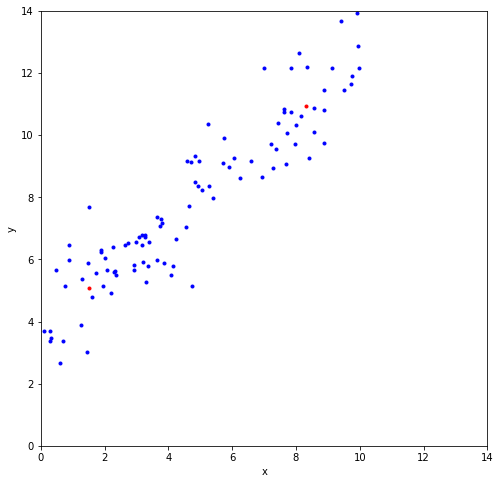

In [172]:
plt.figure(figsize=(8,8))
plt.plot(X_original, y, "b.")
plt.plot(X_teste_original, y_previsto, "r.")
plt.axis([0, 14, 0, 14])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<h3>Usando Scikit-Learn para obter os parâmetros</h3>

In [173]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_original, y)

lin_reg.coef_, lin_reg.intercept_

(array([[0.86051028]]), array([3.79603966]))

In [174]:
lin_reg.predict(X_teste_original)

array([[ 5.08680508],
       [10.938275  ]])

<h2>Exercícios</h2>
<p><b>Exercício 1:</b> Criar um modelo preditivo utilizando regressão linear para prever o valor da coluna cnt do dataset day.csv utilizando apenas a coluna season. Utilize a equação normal para obter os coeficientes do modelo.</p>
<p><b>Exercício 2:</b> Criar um modelo preditivo utilizando regressão linear para prever o valor da coluna cnt do dataset day.csv utilizando apenas a coluna season. Utilize o pacote Scikit-Learn para obter os coeficientes do modelo.</p>
<p><b>Exercício 3:</b> Utilizando os parâmetros descobertos, escrever o modelo obtido sob a forma de equação da reta, ou seja, escrever a função <i>h</i>(<b>x</b>) obtida.</p>